In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('NHANES.csv')

In [ ]:
df.dropna()

,seq_num,age_group,age,gender,intense_sport,bmi,blood_glucose,diabetic_type,oral,insulin_level
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
df['obesity_status'] = df['bmi'].apply(lambda x: 1 if x >= 30 else 0)

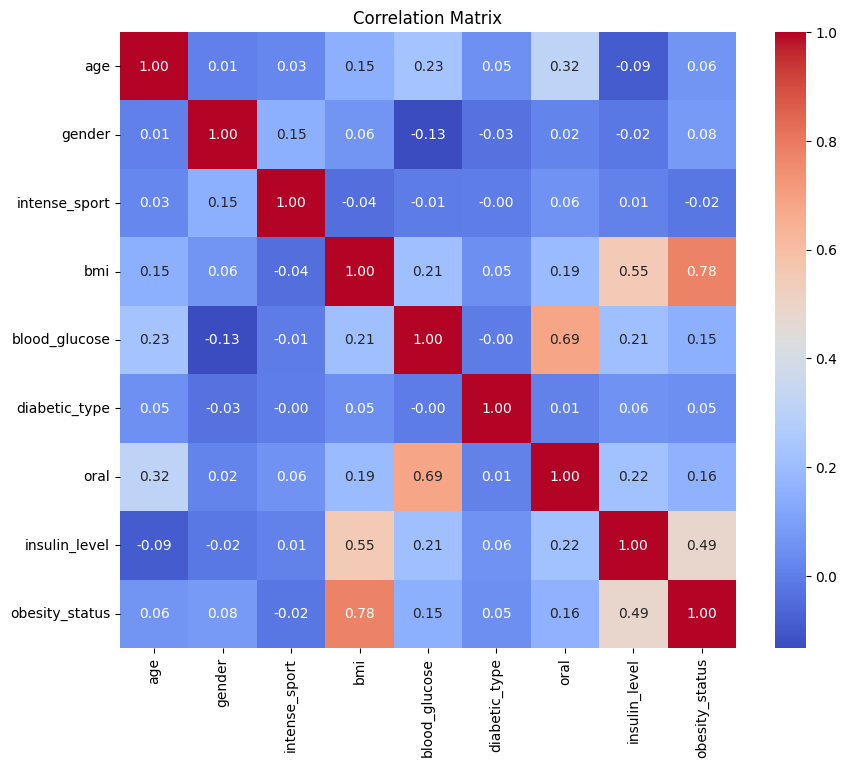

In [ ]:
filtered = df.drop(columns=['seq_num', 'age_group'])
cm = filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_a = df[df["age_group"] == "Adult"]

In [ ]:
df_a['obesity_status'] = df_a['bmi'].apply(lambda x: 1 if x >= 30 else 0)
df_a.head()

<ipython-input-105-d282ca799021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['obesity_status'] = df_a['bmi'].apply(lambda x: 1 if x >= 30 else 0)


,seq_num,age_group,age,gender,intense_sport,bmi,blood_glucose,diabetic_type,oral,insulin_level,obesity_status
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,1
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,1


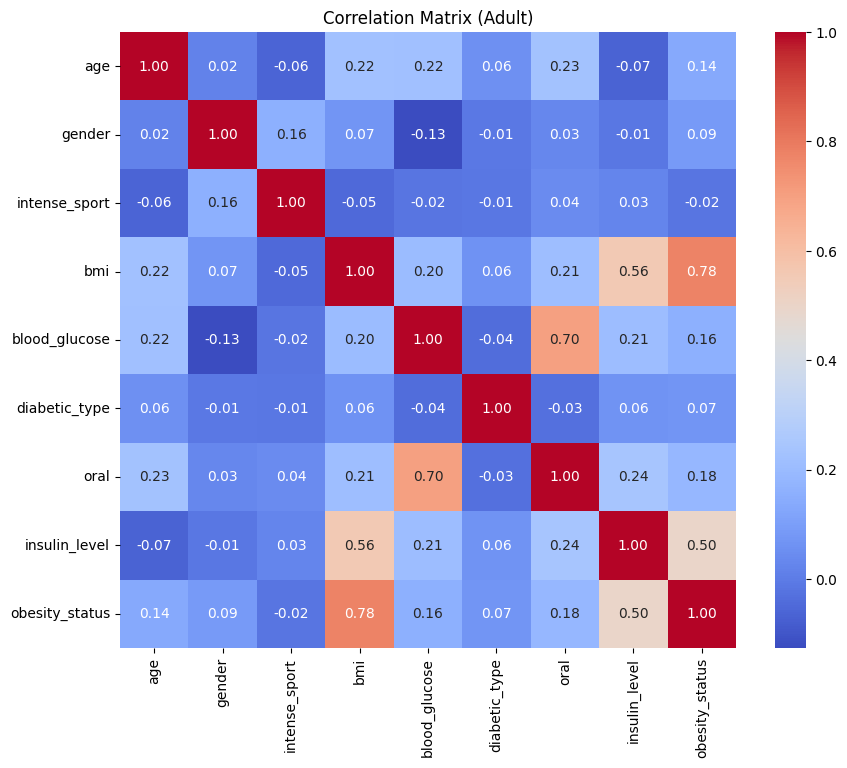

In [ ]:
filtered_a = df_a.drop(columns=['seq_num', 'age_group'])
cma = filtered_a.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cma, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Adult)')
plt.show()

In [ ]:
df_s = df[df["age_group"] == "Senior"]

In [ ]:
df_s['obesity_status'] = df_s['bmi'].apply(lambda x: 1 if x >= 30 else 0)
df_s.head()

<ipython-input-107-413dc6bf2316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['obesity_status'] = df_s['bmi'].apply(lambda x: 1 if x >= 30 else 0)


,seq_num,age_group,age,gender,intense_sport,bmi,blood_glucose,diabetic_type,oral,insulin_level,obesity_status
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47,1
12,73621.0,Senior,80.0,1.0,2.0,24.6,100.0,2.0,97.0,4.33,0
14,73639.0,Senior,71.0,1.0,2.0,30.3,133.0,2.0,295.0,22.92,1
15,73640.0,Senior,67.0,2.0,1.0,22.1,114.0,2.0,150.0,10.09,0
18,73659.0,Senior,70.0,2.0,2.0,46.1,139.0,2.0,154.0,42.67,1


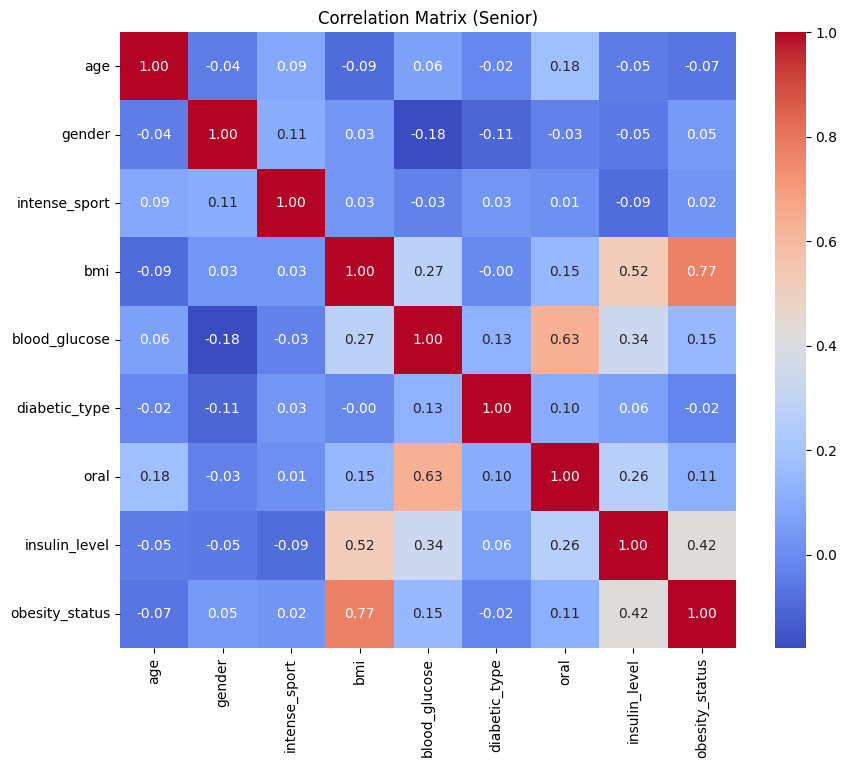

In [ ]:
filtered_s = df_s.drop(columns=['seq_num', 'age_group'])
cms = filtered_s.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cms, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Senior)')
plt.show()

In [ ]:
X1 = df[['intense_sport', 'blood_glucose', 'diabetic_type', 'oral', 'insulin_level']]
y1 = df['obesity_status']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)
f11 = f1_score(y_test1, y_pred1)

print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1-score: {f11:.2f}")

Accuracy: 0.76
Precision: 0.72
Recall: 0.37
F1-score: 0.49


In [ ]:
# 1. Remove constant columns
constant_cols = [col for col in X1.columns if X1[col].nunique() == 1]
if constant_cols:
    X1 = X1.drop(columns=constant_cols)

# 2. Add intercept
X1_const = sm.add_constant(X1)

# 3. Fit model with robust solver
result = sm.Logit(y1, X1_const).fit(method='lbfgs', disp=0)

# 4. Prepare results - exclude 'const' and sort by p-value
feature_importance = pd.DataFrame({
    'Feature': result.params.index,
    'Coefficient': result.params.values,
    'P-Value': result.pvalues.values
})

# Remove constant row if exists
feature_importance = feature_importance[feature_importance['Feature'] != 'const']

# Sort by p-value
feature_importance = feature_importance.sort_values('P-Value')

print("Feature Importance (sorted by P-value):")
print(feature_importance)

Feature Importance (sorted by P-value):
         Feature  Coefficient       P-Value
5  insulin_level     0.163734  3.837646e-77
1  intense_sport    -0.346679  1.010740e-02
3  diabetic_type    -0.748525  1.248420e-02
4           oral     0.002969  5.557929e-02
2  blood_glucose    -0.004024  3.071765e-01


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


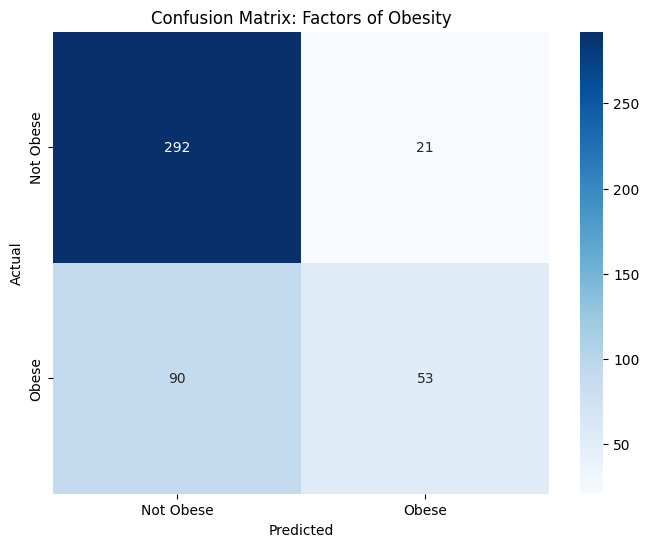

In [ ]:
cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Not Obese', 'Obese'], yticklabels = ['Not Obese', 'Obese'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Factors of Obesity')
plt.show()

Adult Logistic Regression

In [ ]:
X2 = df_a[['intense_sport', 'blood_glucose', 'diabetic_type', 'oral', 'insulin_level']]
y2 = df_a['obesity_status']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
f12 = f1_score(y_test2, y_pred2)

print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1-score: {f12:.2f}")

Accuracy: 0.77
Precision: 0.66
Recall: 0.45
F1-score: 0.54


In [ ]:
# 1. Remove constant columns
constant_cols2 = [col for col in X2.columns if X2[col].nunique() == 1]
if constant_cols2:
    X2 = X2.drop(columns=constant_cols2)

# 2. Add intercept
X2_const = sm.add_constant(X2)

# 3. Fit model with robust solver
result2 = sm.Logit(y2, X2_const).fit(method='lbfgs', disp=0)

# 4. Prepare results - exclude 'const' and sort by p-value
feature_importance2 = pd.DataFrame({
    'Feature': result2.params.index,
    'Coefficient': result2.params.values,
    'P-Value': result2.pvalues.values
})

# Remove constant row if exists
feature_importance2 = feature_importance2[feature_importance2['Feature'] != 'const']

# Sort by p-value
feature_importance2 = feature_importance2.sort_values('P-Value')

print("Feature Importance for Adult (sorted by P-value):")
print(feature_importance2)

Feature Importance for Adult (sorted by P-value):
         Feature  Coefficient       P-Value
5  insulin_level     0.165557  9.295631e-67
1  intense_sport    -0.715626  3.751856e-07
4           oral     0.004923  7.701094e-03
2  blood_glucose    -0.007811  7.269973e-02
3  diabetic_type    -0.484404  1.861311e-01


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Senior Logistic Regression

In [ ]:
X3 = df_s[['intense_sport', 'blood_glucose', 'diabetic_type', 'oral', 'insulin_level']]
y3 = df_s['obesity_status']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)
f13 = f1_score(y_test3, y_pred3)

print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1-score: {f12:.2f}")

Accuracy: 0.77
Precision: 0.66
Recall: 0.45
F1-score: 0.54


In [ ]:
# 1. Remove constant columns
constant_cols3 = [col for col in X3.columns if X3[col].nunique() == 1]
if constant_cols3:
    X3 = X3.drop(columns=constant_cols3)

# 2. Add intercept
X3_const = sm.add_constant(X3)

# 3. Fit model with robust solver
result3 = sm.Logit(y3, X3_const).fit(method='lbfgs', disp=0)

# 4. Prepare results - exclude 'const' and sort by p-value
feature_importance3 = pd.DataFrame({
    'Feature': result3.params.index,
    'Coefficient': result3.params.values,
    'P-Value': result3.pvalues.values
})

# Remove constant row if exists
feature_importance3 = feature_importance3[feature_importance3['Feature'] != 'const']

# Sort by p-value
feature_importance3 = feature_importance3.sort_values('P-Value')

print("Feature Importance for Senior (sorted by P-value):")
print(feature_importance3)

Feature Importance for Senior (sorted by P-value):
         Feature  Coefficient       P-Value
5  insulin_level     0.142624  4.099718e-10
3  diabetic_type    -0.695170  1.670312e-01
1  intense_sport    -0.226683  5.959435e-01
2  blood_glucose    -0.003907  7.310993e-01
4           oral     0.000029  9.927099e-01


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
